# Compte rendu : Force de Pressions sur une digue

# I Introduction
On va s'intéresser à une digue et plus précisément aux forces de qui lui sont appliquées.
La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m 3) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retient une masse d'eau de hauteur  𝐻 l'autre côté étant exposé à l'air. On prendra  𝐻=10m dans toute la suite.

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

De plus on ne considérera que les forces de pressions dues à la hauteur d'eau (la pression de l'air étant négligée).


On modélisera deux digues différentes à l'aide d'équations de droite. On étudiera d'abord le cas où la digue est un triangle isocèle puis en enlevant la moitié droite ou la moité gauche de ce triangle on observera les différences sur les forces entre chaque cas. Puis l'on étudiera le cas pour le coté de la digue vers l'eau qui est une courbe.

## II Méthode de résolution Premiere Partie:

Il nous faut d'abord effectuer quelques calcul pour trouver les forces que l'on va calculer.

La digue est soumise à son poids, aux forces de Pression selon y tel que $P_{eau} (y)$= $\rho g(H-y)$, puis il y a la force normale au sol et enfin la force tangentielle d'équation:
$\vec{T}$ = $\mu$ $\vec{N}$.
 
En nous placant à l'équilibre statique on a donc selon x et y.

$$
\left\{
    \begin{array}{lll}
\vec{T}+\vec{P_x{eau}(y)}=0\\
\vec{N}+\vec{P_y{eau}(y)}+\vec{P}=0\\
 \end{array}
\right.
$$
En effet la force de pression appliquée sur la digue aura une composante selon x et y.




Pour arriver à modéliser les forces il nous faudra tout d'abord afficher les courbes qui sont pour le cas du triangle 
une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$ qui ont pour équation 
\
\begin{cases}
f_{\text{air}}(y) = -\frac{x_a}{H} \cdot (y-H) \\
f_{\text{eau}}(y) = -\frac{x_e}{H} \cdot (y-H)
\end{cases}
\
On a en regardant le point d'application on a un vecteur $\vec n$ normal à la Force et un vectuer $\vec t$  tangent à la surface or on observe entre $\vec t$   et la courbe un angle $\theta$
L'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$

De plus Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1m$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).
​
On obtient donc, pour l'interface eau-béton :
​
$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$
​
avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :
​
$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

Pour faire nos calculs on commencera par calculer le volume de la digue en vérifiant nos calculs de manière analytique. Pour cela on intègrera la surface de la digue selon $L \mathrm{d}l$, puis on calculera le Poids car $P=\rho_{digue}gV$. Puis à l'aide de la biliothèque scipy et de la fonction quad on intègrera la pression selon $dl$ et $\vec{n}$. Ainsi en écrivant les équations d'équilibre statique on aura $T$ et $N$ et en calculant $T/N$ on saura si la digue est en équilibre où non. Car en effet le coefficient de friction statique nous est donné et si le rapport est plus grand que ce dernier la digue ne sera $T/N$ pas en équilibre translationnel.

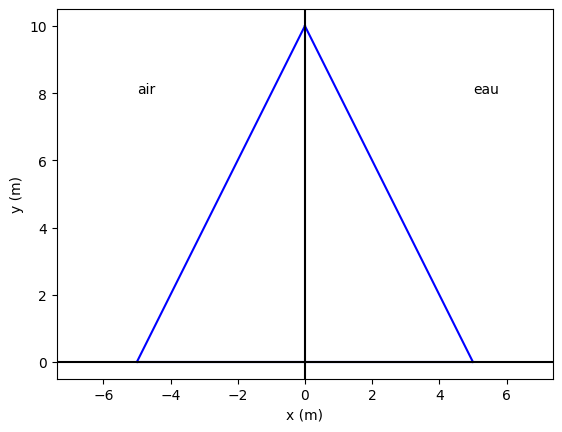

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = 5
L=1
g=9.81
rho_d=3000

# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y-H)*xe/H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  
 
plt.plot([xe, xa], [0, 0], '-b') 

plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') 
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

Ceci sera notre premier cas d'étude.

In [2]:

V_analytique=(xe-xa)/2*L*H # Base * hauteur*Largeur/2
def Largeur(y):
    return L*(feau(y)-fair(y))

V,errueur=si.quad(Largeur,0,H)
print(V_analytique)
print(V)

Poids=rho_d*V*g
print(Poids)

50.0
50.0
1471500.0


In [3]:
df_eau=-xe/H
def P(y):
    return 1000*9.81*(10-y) # Me retourne une erreur dans le calcul de l'intégrale si j'utilise des variables 

def f2(y):
    return P(y)*df_eau # En faisant le calcul on observe que l'on tombe sur la composante selon y sur un sin/cos=tan=f'(y) d'où le df_eau.

resultantx,errorx=si.quad(P,0,H)# Ici on a -cos/cos mettre un signe - serait plus rigoureux mais au final ca ne change pas les calculs.
resultanty,errory=si.quad(f2,0,H)
T=resultantx
N=-resultanty+Poids
print(T,"tangentielle")
print(N,"Normale")
print(T/N,"coefficient de friction")


490500.0 tangentielle
1716750.0 Normale
0.2857142857142857 coefficient de friction


Donc pour les conditions $xe=5$ et $xa=-5$ et en supposant La digue en équilibre translationnel. On trouve que la digue est bien en équilibre car on a bien $T/N$ < $\mu$.

490500.0 tangentielle
735750.0 Normale
0.6666666666666666 coefficient de friction statique


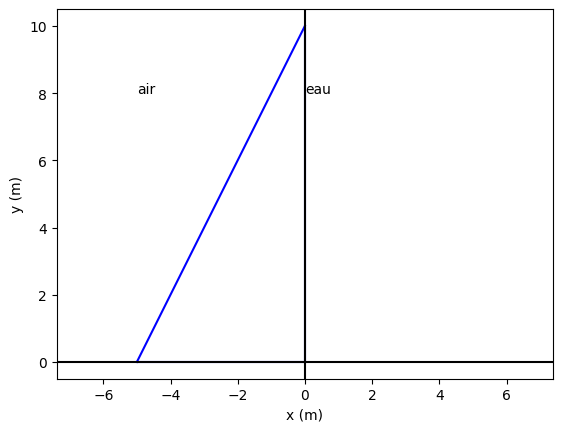

In [4]:
def f_ultime1(y,xe,xa):
    def fair(y,xa):
        return -(y - H) * xa / H

    def feau(y,xe):
        return  -(y-H)*xe/H
    
    def Largeur(y):
        return L*(feau(y,xe)-fair(y,xa))

    V,errueur=si.quad(Largeur,0,H)
    Poids=3000*V*g
    df_eau=-xe/H
    def P(y):
        return 1000*9.81*(10-y)

    def f2(y):
        return P(y)*df_eau

    resultantx,errorx=si.quad(P,0,H)
    resultanty,errory=si.quad(f2,0,H)
    T=resultantx
    N=-resultanty+Poids
    print(T,"tangentielle")
    print(N,"Normale")
    print(T/N,"coefficient de friction statique")
    plt.plot(fair(y,xa), y, '-b') 
    plt.plot(feau(y,xe), y, '-b')  
 
    plt.plot([xe, xa], [0, 0], '-b') 

    plt.xlabel('x (m)') 
    plt.ylabel('y (m)')
    plt.text(xe, 8, 'eau')
    plt.text(xa, 8, 'air')
    plt.axis('equal') 
    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.xlim(-8, 8)
    plt.show()
    
f_ultime1(y,0,xa)

Ici pour $xe=0$ et $xa=-5$ on a  $T/N$ > $\mu$. On en conclut que la digue n'est pas en équilibre translationel pour le cas où la surface en contact est une simple droite allant selon y de 0 à H.

490500.0 tangentielle
981000.0 Normale
0.5 coefficient de friction statique


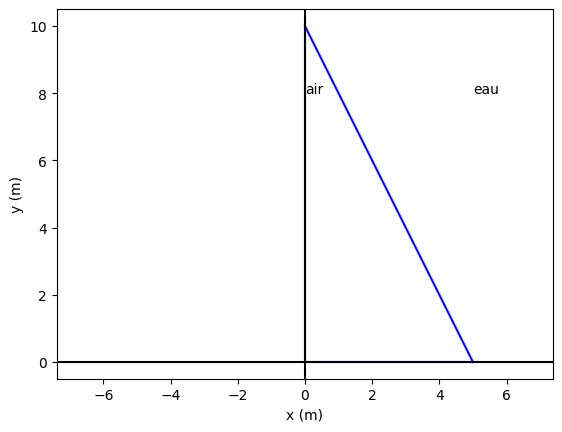

In [5]:

f_ultime1(y,xe,0)

Ici dans le cas ou $xa=0m$ et $xe=5m$. On a le cas opposé il n'y a plus qu'un demi triangle par rapport à celui de base et cette fois la pente est en contact avec l'eau. On a $T/N$=$\mu$ donc la digue est encore à l'équilibre contrairement au cas précédent. Cette différence d'équilibre est liée à la surface en contact avec l'eau. Sur le cas précédent la pression s'applique de manière uniforme avec la force qui augment plus y est petit. Or dans le cas ci dessus les points d'applications ne sont pas les mêmes, la répartiton est moins uniforme de plus si on appliquait le moment en tout point de la pente. Il y a plus de probabilités que la somme des moments soit nul dans ce cas-ci.

## III- Modélisation deuxième partie.
### Cas des digues convexes
On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.
Les calculs seront les mêmes que dans la première partie. On remplacera $df_{eau}$ par l'expression de $f'_{eau} (y)$

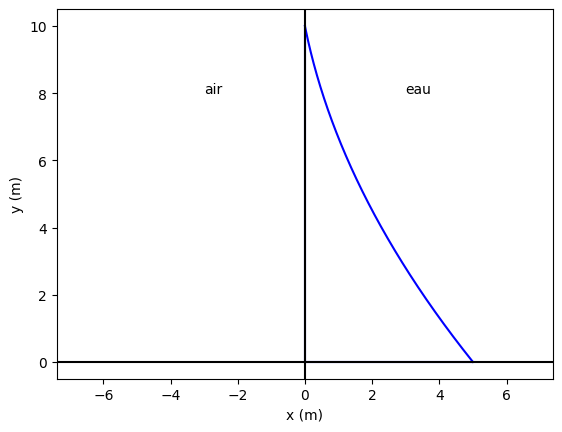

In [6]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0
rho_eau=1000
# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau1(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair1(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau1(y), y, '-b')
plt.plot(fair1(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

490500.0 Force tangentielle
882900.0 Force Normale
0.5555555555555556 coefficient de friction statique


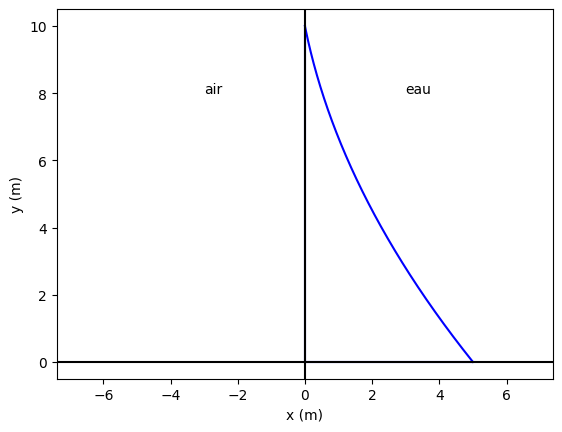

In [7]:
def f_ultime2(y,xe,xa):
    def feau1(y):
        return a * (y / H) ** 2 - (a + xe) * (y / H) +xe
    
    V2,errueur=si.quad(feau1,0,H)
    Poids=3000*V2*g
    
    df_eau=2*a*y/H**2-(a+xe)/H
    def P(y):
        return rho_eau*g*(H-y)

    def f2(y):
        return P(y)*(2*a*y/H**2-(a+xe)/H)

    resultantx,errorx=si.quad(P,0,H)
    resultanty,errory=si.quad(f2,0,H)
    T=resultantx
    N=-resultanty+Poids
    print(T,"Force tangentielle")
    print(N,"Force Normale")
    print(T/N,"coefficient de friction statique")
    plt.plot(feau1(y), y, '-b')
    plt.plot(fair1(y), y, '-b')
    plt.plot([xe, xa], [0, 0], '-b')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.text(3, 8, 'eau')
    plt.text(-3, 8, 'air')
    plt.axis('equal') # Permet d'avoir un plot isométrique
    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.xlim(-8, 8)
    plt.show()
f_ultime2(y,5,0)

Pour ce tracé il n'y a pas équilibre le rapport $T/N$ est supérieur à $\mu$. Ce qui est plutôt étonnant en comparant à la partie 1 où pour le cas proche où on à équilibre. Les changements sont probablement liés à $df_{eau}$ et au volume qui sont différents pour la corube linéaire.


490500.0 Force tangentielle
1079100.0 Force Normale
0.45454545454545453 coefficient de friction statique


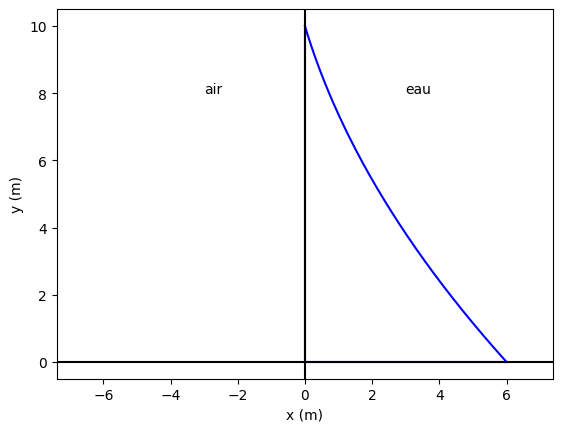

In [8]:
f_ultime2(y,6,0)

Dans ce cas ci $T/N$ est plus petit que pour les pentes affines où le rapport était égal à 0,5. Le cas avec la corube convexe est plus favorable en effet $T/N$=0,454 ce qui est inférieur à 0,5 résultat trouvé pour les affines. Quand on se place à 0,5 on se trouve au cas limite sans aucune perturbation or en réalité on peut trouver des pertubations qui feraient augmenter la valeur du rapport et alors la digue se metterait à bouger. Il vaut donc mieux se laisser une marge avec la courbe convexe et $x_e$=0,6m.

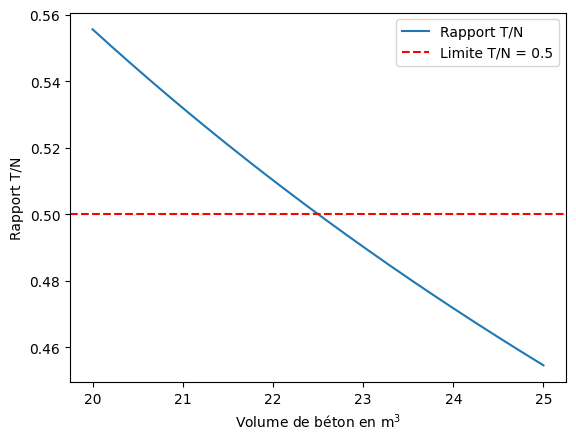

Le volume minimal pour T/N < 0.5 est 22.5025025025025 m^3.


In [9]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

# Paramètres constants
H = 10
xa = 0
g = 9.81  # Supposons que g représente l'accélération due à la gravité

# Fonction pour calculer le volume et le rapport T/N
def V_et_T_sur_N(xe):
    
    V, erreur = si.quad(feau1, 0, H)

    def f2(y):
        return P(y) * (2 * a * y / H ** 2 - (a + xe) / H)

    Poids = 3000 * V * g
    resultantx, erreurx = si.quad(P, 0, H)
    resultanty, erreury = si.quad(f2, 0, H)
    T = resultantx
    N = -resultanty + Poids

    # Calcul du rapport T/N
    rapport = T / N

    return V, rapport

# Boucle pour faire varier xe dans l'intervalle [5, 6]
xe_values = np.linspace(5, 6, 1000)
volumes = []
rapports = []

for xe in xe_values:
    V, rapport = V_et_T_sur_N(xe)
    volumes.append(V)
    rapports.append(rapport)

# Tracer le rapport T/N en fonction du volume
plt.plot(volumes, rapports, label='Rapport T/N')
plt.axhline(0.5, color='red', linestyle='--', label='Limite T/N = 0.5')
plt.xlabel('Volume de béton en m$^{3}$')
plt.ylabel('Rapport T/N')
plt.legend()
plt.show()

# Trouver graphiquement le volume minimal pour T/N < 0.5
min_volume_index = np.argmax(np.array(rapports) < 0.5)
min_volume = volumes[min_volume_index]
print(f"Le volume minimal pour T/N < 0.5 est {min_volume} m^3.")


La forme courbée permet tout d'abord une répartition plus uniforme des forces de pression contrairement à la forme linéaire où les forces seraient plus concentrées en bas. La digue peut aussi être plus résistante aux forces avec cette forme de plus les moments des forces ne seraient potentiellement pas les mêmes et la somme pourrait donner des moments nuls. 
De plus la forme courbée permet de réduire le Volume ce qui veut dire qu'on réduit le Poids qui intervient directement dans nos équations d'équilibre statique. Ce faisant on réduit N ce qui permet bien de baisser la valeur de $\mu$. Cependant on doit rester au dessus du volume minimal pour que $T/N$ soit supérieur à 0,5.

## IV-Conclusion:

On a donc modélisé les différentes forces qui sont appliquées à différentes digues et on a calculé si la digue en question était en équilibre translationnel selon le coefficient de frottement statique.
Tout d'abord on a des digues avec des pentes linéaires où l'on fait varier la base des triangles. Avec au début $x_e$=5 et $x_a$=-5 puis $x_e$=0 et $x_a$=-5 et enfin $xa=0$ et $xe=5$. On observe alors que lorsque la pente est en contact avec l'eau la digue est bien en équilibre translationnel. Dans le cas contraire elle glisse.

Puis on a calculé les forces et le coefficient de frottement dans le cas où la face de la digue est une courbe convexe on a alors un volume réduit de surface de béton. Cela implique donc que le coefficient de friction statique diminue. Or pour $x_e$=5m la digue glisse ce qui parait plutôt étonnant. En traçant le rapport T/N en fonction du volume du béton on troive donc que pour le cas convexe il faut prendre en compte le volume minimal qui est de 22,5 m$^{3}$ pour qu'il y ait bien équilibre statique et qu'il y ait une marge en cas de pertubations éventuelles dans les forces.

Cependant avec ce modèle on s'assure seulement que la digue ne glisse pas. Elle pourrait toujours basculer pour cela il faudrait vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Ce qui amènerait donc à:

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)

Ce n'est qu'en faisant ces calculs qui n'auront pas les mêmes résultats selon les valeurs des pentes alors on pourra conclure sur le fait que la digue soit entièrement statique où non.
De plus on aurait pu tracer les graphes des erreurs pour les calculs d'intégrales dans le programme et prendre cette incertitude en compte dans nos calculs.
